###  查看数据结构

In [42]:
import pandas as pd
import os
WEATHER_PATH = './datasets'
def load_weather_data(weather_path):
    csv_path = os.path.join(weather_path,"weather.csv")
    return pd.read_csv(csv_path)

In [43]:
weather = load_weather_data(WEATHER_PATH)
print(weather.columns)
print(weather.info())
print(weather.describe())

Index(['date', 'station', 'city', 'county', 'pressure', 'wind_speed',
       'wind_direction', 'temperature', 'humidity', 'rain20', 'rain08',
       'cloud', 'visibility', 'phenomenon', 'sunny', 'cloudy', 'rain', 'fog',
       'haze', 'dust', 'thunder', 'lightning', 'snow', 'hail', 'wind'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102655 entries, 0 to 102654
Data columns (total 25 columns):
date              102655 non-null int64
station           102655 non-null object
city              102655 non-null object
county            102655 non-null object
pressure          102655 non-null float64
wind_speed        102655 non-null float64
wind_direction    102655 non-null int64
temperature       102655 non-null float64
humidity          102655 non-null float64
rain20            102655 non-null float64
rain08            102655 non-null float64
cloud             102655 non-null float64
visibility        102655 non-null int64
phenomenon        102655 non-null obje

### 数据初步清洗

In [ ]:
# # 处理时间属性
import numpy as np
def weather_clean(weather):
    # print(weather["cloud"].describe())
    date = pd.to_datetime(weather['date'].apply(lambda x: str(x)))
    weather['year'] =date.dt.year
    weather['month'] = date.dt.month
    weather['week'] = date.dt.weekofyear
    weather['quarter'] = date.dt.to_period('Q').astype('str')[:-2].apply(lambda x:x[-1]).astype('int')
    weather['day'] = date.dt.dayofyear
    # 将无效数据替换成NAN
    weather[weather==999999] = np.NaN
    weather[weather==999990] = np.NaN
    # 去掉wind_direction和phenomenon属性
    weather = weather.drop(["wind_direction","phenomenon"],axis=1)
    print(weather.describe())
    return weather
weather = weather_clean(weather)

### 数据可视化

In [46]:
import matplotlib
matplotlib.rcParams['font.sans-serif']=['Droid Sans Fallback'] #用来正常显示中文标签
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 绘制某个属性关于季度和地理位置的变化情况
def plot_of_quarter_city(X,attribe):
    # 将属性按照季度和城市分组
    df_group = X[attribe].groupby([X['quarter'],X['city']]).mean()
    # 对多级索引中的city进行重命名
    df_group = df_group.rename({'重庆市':'chongqing','北京市':'beijing','上海市':'shanghai'},axis='index')
    # 将series 按照city展开成一个表格
    pop_df = df_group.unstack()
    return pop_df

weather.describe()

,date,pressure,wind_speed,temperature,humidity,rain20,rain08,cloud,visibility,sunny,...,thunder,lightning,snow,hail,wind,year,month,week,quarter,day
count,1.026550e+05,102164.000000,102642.000000,102372.000000,102365.000000,98670.000000,98402.000000,40687.000000,100130.000000,102655.000000,...,102655.000000,102655.000000,102655.000000,102655.000000,102655.000000,102655.000000,102655.000000,102655.000000,102653.000000,102655.000000
mean,2.015097e+07,987.637546,3.830137,16.581338,71.050372,3.083463,3.086780,68.469074,5937.232767,0.244956,...,0.010384,0.011047,0.014865,0.002445,0.010569,2015.030442,6.535765,26.670342,2.512347,183.479821
std,1.415813e+04,27.775018,1.708854,9.182736,17.914230,10.050933,9.846583,34.377992,6741.637922,0.430063,...,0.101373,0.104522,0.121014,0.049388,0.102263,1.415439,3.450631,15.070427,1.117836,105.471395
min,2.013010e+07,0.000000,0.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000,1.000000
25%,2.014041e+07,969.200000,2.600000,9.600000,62.000000,0.000000,0.000000,40.000000,1500.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,4.000000,14.000000,2.000000,92.000000
50%,2.015072e+07,987.500000,3.500000,17.630000,74.500000,0.000000,0.000000,80.000000,3401.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,7.000000,27.000000,3.000000,184.000000
75%,2.016101e+07,1010.000000,4.700000,23.900000,84.000000,0.900000,1.100000,100.000000,8000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,10.000000,40.000000,4.000000,275.000000
max,2.017123e+07,1041.300000,17.800000,36.500000,100.000000,268.399900,258.899900,103.330000,50000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000,53.000000,4.000000,365.000000


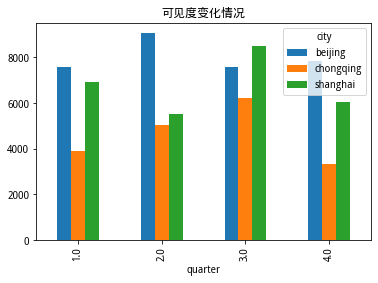

In [47]:
# 每个城市在每个季度的可见度
df_vb_group1 = plot_of_quarter_city(weather,'visibility')
# 对多级索引重新命名
df_vb_group1.plot(kind='bar')
plt.title("可见度变化情况")
plt.show()

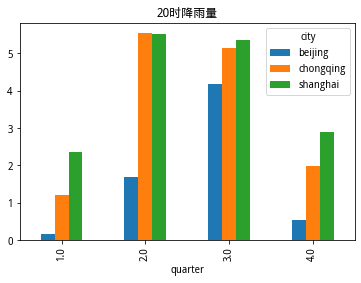

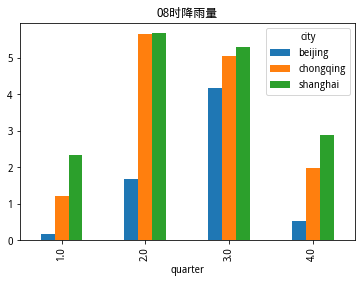

In [48]:
# 绘制降雨量
df_rain20_group = plot_of_quarter_city(weather,'rain20')
df_rain20_group.plot(kind='bar')
plt.title("20时降雨量")
df_rain08_group = plot_of_quarter_city(weather,'rain08')
df_rain08_group.plot(kind='bar')
plt.title("08时降雨量")
plt.show()

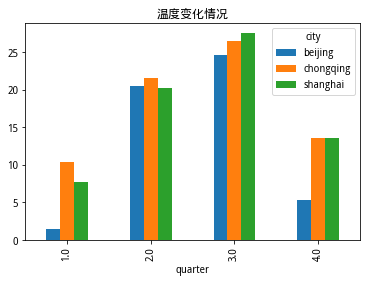

In [49]:
## 温度变化情况
df_tempature_group = plot_of_quarter_city(weather,'temperature')
df_tempature_group.plot(kind='bar')
plt.title("温度变化情况")
plt.show()

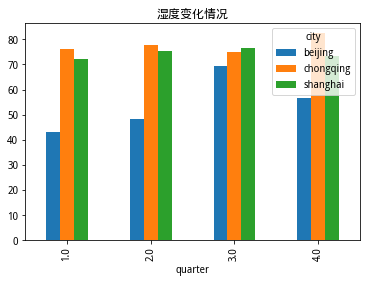

In [50]:
## 湿度变化情况
df_humidity_group = plot_of_quarter_city(weather,'humidity')
df_humidity_group.plot(kind='bar')
plt.title("湿度变化情况")
plt.show()

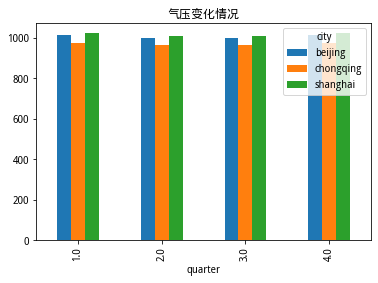

In [51]:
## 气压变化情况
df_pressure_group = plot_of_quarter_city(weather,'pressure')
df_pressure_group.plot(kind='bar')
plt.title("气压变化情况")
plt.show()

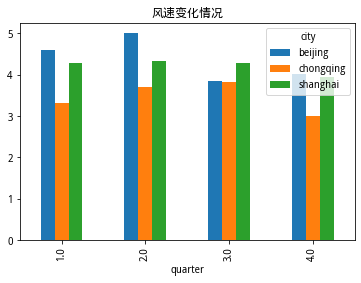

In [52]:
## 风速变化情况
df_windspeed_group = plot_of_quarter_city(weather,'wind_speed')
df_windspeed_group.plot(kind='bar')
plt.title("风速变化情况")
plt.show()

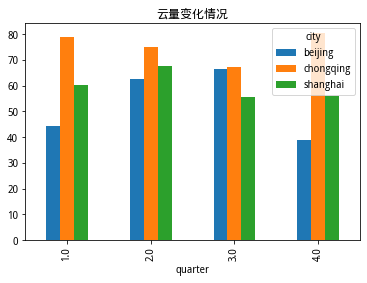

In [53]:
## 云量变化情况
df_cloud_group = plot_of_quarter_city(weather,'cloud')
df_cloud_group.plot(kind='bar')
plt.title("云量变化情况")
plt.show()

In [54]:
## 各个属性相互之间的相关性
# from pandas.plotting import scatter_matrix
# attributes = ['wind_speed','temperature', 'humidity', 'rain20', 'cloud', 'visibility']
# scatter_matrix(weather[attributes],figsize=(12,8))
# plt.show()

### 预测温度

In [60]:
# 目标： 使用前几天的观测数据预测未来的温度
# 绘制温度与其他属性的相关性
# num_weather=weather_prepared.drop(["date","quarter","station","city","county"],axis=1)
corr_matrix = weather_prepared.corr()
corr_matrix["temperature"].sort_values(ascending=False)
# print(weather.describe())

temperature    1.000000
quarter        0.195551
week           0.182164
month          0.182126
day            0.179577
chongqin       0.178857
humidity       0.168174
rain08         0.148470
rain20         0.113414
lightning      0.061459
thunder        0.059354
visibility     0.058664
wind           0.058471
rain           0.057031
fog            0.039954
shanghai       0.036947
wind_speed     0.036160
cloud          0.004965
hail          -0.001418
dust          -0.005076
snow          -0.109172
haze          -0.120916
sunny         -0.136340
cloudy        -0.170543
beijing       -0.232989
pressure      -0.322805
Name: temperature, dtype: float64

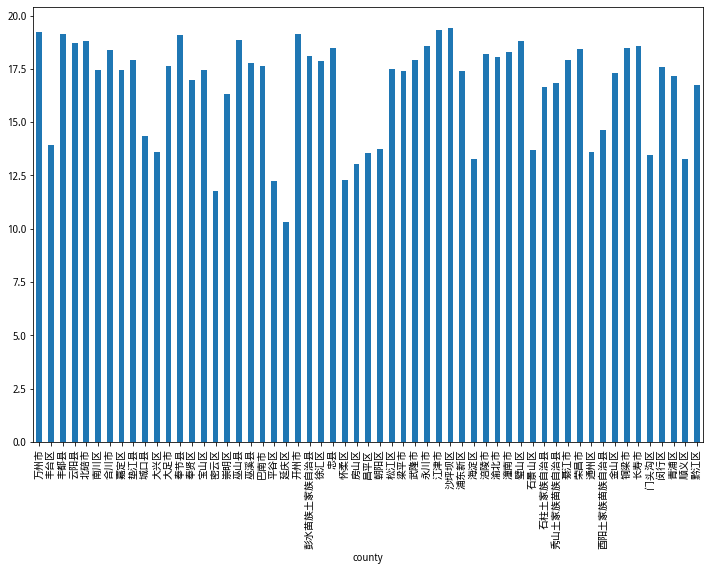

In [63]:
# 将weather按照时间和区进行排序
grouped_temp = weather['temperature'].groupby(weather['county']).mean()
grouped_temp.plot(kind='bar',figsize=(12,8))

### 生成数据集

In [102]:
## 标签具有单个属性

# 选择窗口 单个属性
def windows_select(data_perpared,feature_size,squence_length,temper_dim):
    features = []
    labels = []
    for i in range(data_perpared.shape[0]-squence_length):
        x = np.array(data_perpared[i:i+squence_length,:]).flatten()
        y = data_perpared[i+squence_length,temper_dim] # 第temper_dim维是温度
        features.append(x)
        labels.append(y)
    features = np.array(features)
    labels = np.array(labels)
    return features,labels

def shuffle_data(features,labels):
    # shuffle data
    shuffle_indicies = np.random.permutation(features.shape[0])
    features = features[shuffle_indicies,:]
    labels = labels[shuffle_indicies]
    return features,labels


# 数据预处理
def get_data(data_perpared,is_joint=False,squence_length=20,feature_size=7,temper_dim=2,train_ratio=0.8,validate_ratio=0.1):
    if not is_joint:
        data_perpared = data_perpared[:,:feature_size] # 取前面7维的数据
        features,labels =windows_select(data_perpared,feature_size,squence_length,temper_dim)
        features,labels = shuffle_data(features,labels)
    else:
        data_perpared[0] = data_perpared[0][:,:feature_size]
        features,labels = windows_select(data_perpared[0],feature_size,squence_length,temper_dim)
        for data in data_perpared[1:]:
            data = data[:,:feature_size] # 取前面7维的数据
            # 对一个地级市内的数据进行分组
            f,l =windows_select(data,feature_size,squence_length,temper_dim)
            features = np.vstack((features,f)) # 垂直拼接
            labels = np.hstack((labels,l))  # 水平拼接
        features,labels = shuffle_data(features,labels)
    print("features.shape",features.shape)
    print("labels.shape",labels.shape)
    # train samples
    train_row = round(features.shape[0]*train_ratio)
    validate_num = round(features.shape[0]*validate_ratio)
    test_num = features.shape[0]-train_row-validate_num
    x_train = np.reshape(features[:train_row,:],(train_row,squence_length,feature_size))
    y_train = np.reshape(labels[:train_row],(train_row,-1))
    # validation samples
    x_val = np.reshape(features[train_row:train_row+validate_num,:],(validate_num,squence_length,feature_size))
    y_val = np.reshape(labels[train_row:train_row+validate_num],(validate_num,-1))
    # test samples
    x_test = np.reshape(features[train_row+validate_num:,:],(test_num,squence_length,feature_size))
    y_test = np.reshape(labels[train_row+validate_num:],(test_num,-1)) 
    print("train_samples:",x_train.shape,y_train.shape)
    print("validate_samples:",x_val.shape,y_val.shape)
    print("test_samples:",x_test.shape,y_test.shape)
    return (x_train,y_train,x_val,y_val,x_test,y_test)



features.shape (100945, 780)
labels.shape (100945,)
train_samples: (80756, 30, 26) (80756, 1)
validate_samples: (10094, 30, 26) (10094, 1)
test_samples: (10095, 30, 26) (10095, 1)


In [ ]:
### 标签具有多个属性

# 选择窗口 多个属性
def windows_select_multi(data_perpared,feature_size,squence_length,temper_dim):
    features = []
    labels = []
    for i in range(data_perpared.shape[0]-squence_length):
        x = np.array(data_perpared[i:i+squence_length,:]).flatten()
        y = data_perpared[i+squence_length,:temper_dim] # 前temper_dim维
        features.append(x)
        labels.append(y)
    features = np.array(features)
    labels = np.array(labels)
    return features,labels

def shuffle_data_multi(features,labels):
    # shuffle data
    shuffle_indicies = np.random.permutation(features.shape[0])
    features = features[shuffle_indicies,:]
    labels = labels[shuffle_indicies,:]
    return features,labels


# 数据预处理
def get_data_multi(data_perpared,is_joint=False,squence_length=20,feature_size=26,temper_dim=11,train_ratio=0.8,validate_ratio=0.1):
    # data_perpared 是二维数据
    if not is_joint:
        data_perpared = data_perpared[:,:feature_size] # 取前面7维的数据
        features,labels =windows_select_multi(data_perpared,feature_size,squence_length,temper_dim)
        features,labels = shuffle_data_multi(features,labels)
    # data_perpared 是三维数据，(county_num,feature_size,temper_dim)
    else:
        data_perpared[0] = data_perpared[0][:,:feature_size]
        features,labels = windows_select_multi(data_perpared[0],feature_size,squence_length,temper_dim)
        for data in data_perpared[1:]:
            data = data[:,:feature_size] # 取前面7维的数据
            # 对一个地级市内的数据进行分组
            f,l =windows_select_multi(data,feature_size,squence_length,temper_dim)
            features = np.vstack((features,f)) # 垂直拼接
            labels = np.vstack((labels,l))  # 垂直拼接
        features,labels = shuffle_data_multi(features,labels)
    print("features.shape",features.shape)
    print("labels.shape",labels.shape)
    # train samples
    train_row = round(features.shape[0]*train_ratio)
    validate_num = round(features.shape[0]*validate_ratio)
    test_num = features.shape[0]-train_row-validate_num
    x_train = np.reshape(features[:train_row,:],(train_row,squence_length,feature_size))
    y_train = np.reshape(labels[:train_row,:],(train_row,temper_dim))
    # validation samples
    x_val = np.reshape(features[train_row:train_row+validate_num,:],(validate_num,squence_length,feature_size))
    y_val = np.reshape(labels[train_row:train_row+validate_num,:],(validate_num,temper_dim))
    # test samples
    x_test = np.reshape(features[train_row+validate_num:,:],(test_num,squence_length,feature_size))
    y_test = np.reshape(labels[train_row+validate_num:,:],(test_num,temper_dim)) 
    print("train_samples:",x_train.shape,y_train.shape)
    print("validate_samples:",x_val.shape,y_val.shape)
    print("test_samples:",x_test.shape,y_test.shape)
    return (x_train,y_train,x_val,y_val,x_test,y_test)
    

### 模型设计

In [65]:
from keras import Model
from keras.layers import Input,LSTM,Dropout,Dense,Activation,Conv1D,AveragePooling1D,Bidirectional,Add

In [66]:
# 多对一 
def BLSTM_model(input_shape):
    x_in = Input(input_shape,name='input')
    x = Conv1D(64,2,padding='same',name='conv1')(x_in)
    x = AveragePooling1D(2,name='apool1')(x)
    x1 = Bidirectional(LSTM(80,go_backwards=False),name='forward_lstm')(x)
    x1 = Dropout(0.3,name='drop1')(x1)
    x2 = Bidirectional(LSTM(80,go_backwards=True),name='backward_lstm')(x)
    x2 = Dropout(0.3,name='drop2')(x2)
    x = Add(name='add')([x1,x2])
    x = Dense(100,activation='relu',name='dense1')(x)  
    x = Dropout(0.3,name='drop3')(x)
    x = Dense(50,activation='relu',name='dense2')(x)  # 70
    x = Dropout(0.2,name='drop4')(x)
    x = Dense(10,activation='relu',name='dense3')(x)  # 20
    x = Dropout(0.1,name='drop5')(x)
    x = Dense(1,activation='sigmoid',name='dense4')(x)  #linear
    return Model(x_in,x,name='BLSTM')
# 多对多
def BLSTM_model_multi(input_shape,classes):
    x_in = Input(input_shape,name='input')
    x = Conv1D(64,2,padding='same',name='conv1')(x_in)
    x = AveragePooling1D(2,name='apool1')(x)
    x1 = Bidirectional(LSTM(80,go_backwards=False),name='forward_lstm')(x)
    x1 = Dropout(0.3,name='drop1')(x1)
    x2 = Bidirectional(LSTM(80,go_backwards=True),name='backward_lstm')(x)
    x2 = Dropout(0.3,name='drop2')(x2)
    x = Add(name='add')([x1,x2])
    x = Dense(100,activation='relu',name='dense1')(x)  
    x = Dropout(0.3,name='drop3')(x)
    x = Dense(50,activation='relu',name='dense2')(x)  # 70
    x = Dropout(0.2,name='drop4')(x)
    x = Dense(10,activation='relu',name='dense3')(x)  # 20
    x = Dropout(0.1,name='drop5')(x)
    x = Dense(classes,activation='sigmoid',name='dense4')(x)  #linear
    return Model(x_in,x,name='BLSTM')

### 回归模型的训练和测试

In [67]:
## 回归模型的测试
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
# 评价指标
def evaluate_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    print("mse: ",mse)
    print("mae: ",mae)
    print('rmse: ',rmse)
    print("r2_score:",r2)
    
model_path = './checkpoint/weights-temp_acc=0.94.h5'    

# 测试模型
def test(model,x_test,y_test):

    model.load_weights(model_path)
    # predict
    y_pred = model.predict(x_test)
    # 评价指标
    evaluate_metrics(y_test,y_pred)
    # plot
    y_pred = y_pred.flatten()
    y_test = y_test.flatten()
    return y_pred,y_test
    

In [68]:
#### 回归模型的训练
from keras.optimizers import RMSprop,Adam
from keras import optimizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from collections import Counter

# 训练和预测
def train_and_predict(x_train,y_train,x_val,y_val,x_test,y_test,is_train=True):
    input_shape = (squence_length,feature_size)
    # train model
    model = BLSTM_model(input_shape)
    model.compile(loss="mse",optimizer=Adam())
    print(model.summary())
    if is_train:
        cb_ckpt = ModelCheckpoint('./checkpoint/weights.{epoch:02d}-{val_loss:.2f}.h5',monitor='val_loss',
                                  save_best_only=True,mode='min',period=20)
        history = model.fit(x_train,y_train,batch_size=32,epochs=100,
                            validation_data=(x_val,y_val),shuffle=True,
                           callbacks=[cb_ckpt,
                            EarlyStopping(monitor='val_loss',patience=10)])
        plt.plot(history.history['loss'],label='train')
        plt.plot(history.history['val_loss'],label='test')
        plt.legend()
        plt.show()
    else:
        y_pred,y_test = test(model,x_test,y_test)
        return y_pred,y_test

### 在本数据集上测试回归模型 （预测温度）

In [ ]:
from sklearn.compose import ColumnTransformer
# # 转换流水线
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),# 处理缺失值
    ('std_scaler',MinMaxScaler()),# 最大最小归一化
])

In [72]:
# # 对weather 进行数据清理
num_weather = weather.drop(["date",'city','county','station','year'],axis=1)
num_attribs = list(num_weather.columns)
# 处理数值和文本属性的流水线
full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("city",OneHotEncoder(),['city']),
])
data_perpared = full_pipeline.fit_transform(weather)
weather_clean = pd.DataFrame(data_perpared,columns=num_attribs+['shanghai','beijing', 'chongqin'])
print(weather_clean.columns)
weather_clean[['date','county']] = weather[['date','county']]

def generate_features(weather_clean):
    # 按照时间和地区进行排序
    sortweather = weather_clean.sort_values(by=['county','date'],ascending=(False,True))
    data_perpared_countys = []
    # 按照地级市进行分组
    for name,group in sortweather.groupby('county'):
        group = group.drop(['date','county'],axis=1)
        group_array = np.array(group)
        data_perpared_countys.append(group_array)
    return data_perpared_countys

data_perpared_countys = generate_features(weather_clean)
print(len(data_perpared_countys))


Index(['pressure', 'wind_speed', 'temperature', 'humidity', 'rain20', 'rain08',
       'cloud', 'visibility', 'sunny', 'cloudy', 'rain', 'fog', 'haze', 'dust',
       'thunder', 'lightning', 'snow', 'hail', 'wind', 'month', 'week',
       'quarter', 'day', 'shanghai', 'beijing', 'chongqin'],
      dtype='object')
57
(1820, 26)
[0.95870546 0.12359551 0.40720721 0.7        0.         0.
 0.         0.14       1.         1.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.        ]
[0.97666379 0.46067416 0.24504505 0.31       0.         0.
 0.06774412 0.6        0.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.        ]
[0.94650917 0.14606742 0.43963964 0.68       0.         0.
 0.19355463 0.3        1.         1.         0.         0.
 0.         0.         0.        

KeyboardInterrupt: 

In [ ]:
# 训练模型
# data_perpared_countys:处理后气象数据（数组），squence_length：窗口大小，temper_dim:温度的维度， feature_size： 特征数
# load data
x_train,y_train,x_val,y_val,x_test,y_test = get_data(data_perpared_countys,True,30,26,2)
#train_and_predict(x_train,y_train,x_val,y_val,x_test,y_test,is_train=True)

In [70]:
# 测试模型
model_path = './checkpoint/weights-temp_acc=0.97.h5' 
print(data_perpared_countys[0].shape)
y_pred,y_test = train_and_predict(x_train,y_train,x_val,y_val,x_test,y_test,False)

(1820, 26)
features.shape (100945, 780)
labels.shape (100945,)
train_samples: (80756, 30, 26) (80756, 1)
validate_samples: (10094, 30, 26) (10094, 1)
test_samples: (10095, 30, 26) (10095, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 30, 26)       0                                            
__________________________________________________________________________________________________
conv1 (Conv1D)                  (None, 30, 64)       3392        input[0][0]                      
__________________________________________________________________________________________________
apool1 (AveragePooling1D)       (None, 15, 64)       0           conv1[0][0]                      
__________________________________________________________________________________________________
forward_lstm (Bid

mse:  2.1513376280559844
mae:  1.1239972091871302
rmse:  1.4667438863196207
r2_score: 0.973942647806535


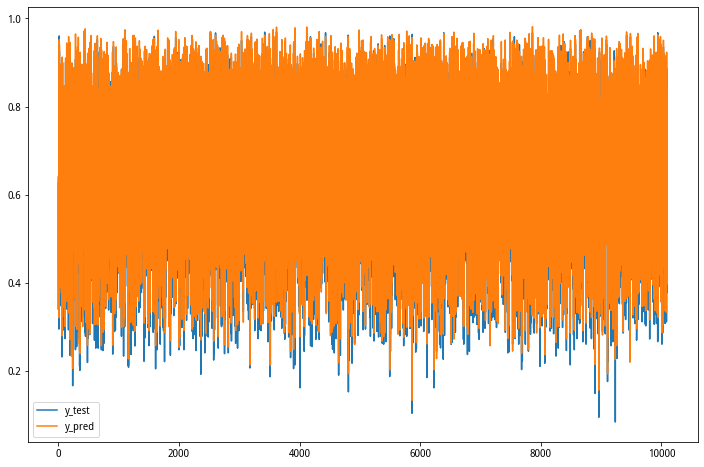

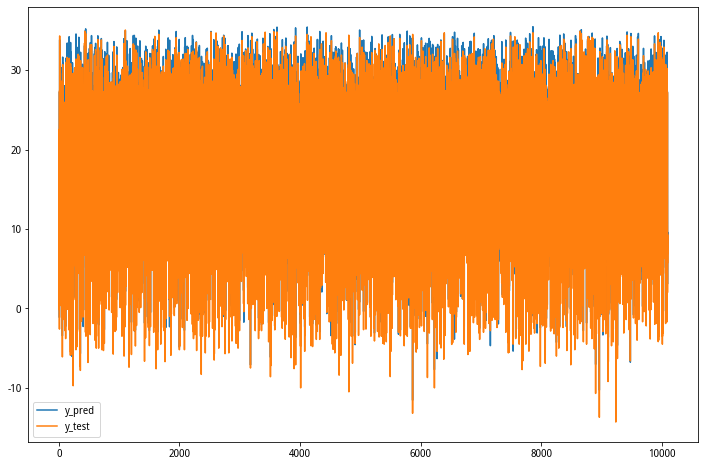

In [71]:
# 绘制温度变化图形
# # 保留温度的最大最小值
temper_max = np.max(weather['temperature'])
temper_min = np.min(weather['temperature'])
# 还原温度值
y_pred_orignal = np.array(y_pred)*(temper_max-temper_min)+temper_min
y_test_orignal = np.array(y_test)*(temper_max-temper_min)+temper_min

evaluate_metrics(y_pred_orignal,y_test_orignal)

fig = plt.figure(figsize=(12,8))
plt.plot(y_test,label='y_test')
plt.plot(y_pred,label='y_pred')
plt.legend()
plt.show()
fig1 = plt.figure(figsize=(12,8))
plt.plot(y_pred_orignal,label='y_pred')
plt.plot(y_test_orignal,label='y_test')
plt.legend()
plt.show()

### 预测可见度

In [31]:
corr_matrix = weather_clean.corr()
corr_matrix['visibility'].sort_values(ascending=False)

visibility     1.000000
sunny          0.298675
beijing        0.193008
wind_speed     0.176288
pressure       0.123239
cloudy         0.064954
shanghai       0.060700
temperature    0.058664
thunder        0.019087
lightning      0.018984
wind           0.017359
quarter       -0.009172
month         -0.014894
day           -0.016777
week          -0.019524
dust          -0.029075
hail          -0.038406
snow          -0.070668
haze          -0.085900
rain08        -0.108752
rain20        -0.142844
rain          -0.212679
chongqin      -0.218360
cloud         -0.283072
date          -0.294233
humidity      -0.487327
fog           -0.581176
Name: visibility, dtype: float64

In [33]:
## 训练模型
# load data
x_train,y_train,x_val,y_val,x_test,y_test = get_data(data_perpared_countys,True,30,26,7)
#train_and_predict(x_train,y_train,x_val,y_val,x_test,y_test,is_train=True)

Index(['pressure', 'wind_speed', 'temperature', 'humidity', 'rain20', 'rain08',
       'cloud', 'visibility', 'sunny', 'cloudy', 'rain', 'fog', 'haze', 'dust',
       'thunder', 'lightning', 'snow', 'hail', 'wind', 'month', 'week',
       'quarter', 'day', 'shanghai', 'beijing', 'chongqin', 'date', 'county'],
      dtype='object')


In [ ]:
## 测试模型
model_path = './checkpoint/weights-visibility_acc=0.78.h5' 
y_pred,y_test = train_and_predict(x_train,y_train,x_val,y_val,x_test,y_test,False)

In [ ]:
# 绘制可见度变化图形
# # 保留可见度的最大最小值
visbi_max = np.max(weather['visibility'])
visbi_min = np.min(weather['visibility'])
# 还原温度值
y_pred_orignal = np.array(y_pred)*(visbi_max-visbi_min)+visbi_min
y_test_orignal = np.array(y_test)*(visbi_max-visbi_min)+visbi_min

evaluate_metrics(y_pred_orignal,y_test_orignal)

fig = plt.figure(figsize=(12,8))
plt.plot(y_test,label='y_test')
plt.plot(y_pred,label='y_pred')
plt.legend()
plt.show()

fig1 = plt.figure(figsize=(12,8))
plt.plot(y_pred_orignal,label='y_pred')
plt.plot(y_test_orignal,label='y_test')
plt.legend()
plt.show()

#### 在其他数据集上测试模型

In [ ]:
# 在其他数据集上的测试
other_weather = pd.read_csv('./datasets/data.csv')
print(other_weather.columns)
num_other_weather = other_weather.drop("TIME",axis=1)
num_attribs = list(num_other_weather.columns)
# 处理数值和文本属性的流水线
full_pipeline1 = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
])
other_data_perpared = full_pipeline1.fit_transform(other_weather)

In [ ]:
# load data
x_train,y_train,x_val,y_val,x_test,y_test = get_data(data_perpared_countys,False,30,26,7)
# 训练模型
#train_and_predict(x_train,y_train,x_val,y_val,x_test,y_test,is_train=True)

In [ ]:
# 测试模型
model_path = './checkpoint/otherweather/weights-temp_0.96.h5'
y_pred,y_test = train_and_predict(x_train,y_train,x_val,y_val,x_test,y_test,False)

In [ ]:
# 绘制温度变化图形
# # 保留温度的最大最小值
temper_max = np.max(other_weather['TEMPERATURE [degC]'])
temper_min = np.min(other_weather['TEMPERATURE [degC]'])
# 还原温度值
y_pred_orignal = np.array(y_pred)*(temper_max-temper_min)+temper_min
y_test_orignal = np.array(y_test)*(temper_max-temper_min)+temper_min

# error rate
evaluate_metrics(y_pred_orignal,y_test_orignal)

fig = plt.figure(figsize=(12,8))
plt.plot(y_test,label='y_test')
plt.plot(y_pred,label='y_pred')
plt.legend()
plt.show()
fig1 = plt.figure(figsize=(12,8))
plt.plot(y_pred_orignal,label='y_pred')
plt.plot(y_test_orignal,label='y_test')
plt.legend()
plt.show()

### 预测多个数值属性

Index(['pressure', 'wind_speed', 'temperature', 'humidity', 'rain20', 'rain08',
       'cloud', 'visibility', 'sunny', 'cloudy', 'rain', 'fog', 'haze', 'dust',
       'thunder', 'lightning', 'snow', 'hail', 'wind', 'month', 'week',
       'quarter', 'day', 'shanghai', 'beijing', 'chongqin', 'date', 'county'],
      dtype='object')
features.shape (100945, 780)
labels.shape (100945, 7)
train_samples: (80756, 30, 26) (80756, 7)
validate_samples: (10094, 30, 26) (10094, 7)
test_samples: (10095, 30, 26) (10095, 7)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 30, 26)       0                                            
__________________________________________________________________________________________________
conv1 (Conv1D)                  (None, 30, 64)       3392        input[0][0]             

80756/80756 [==============================] - 136s 2ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 39/100
80756/80756 [==============================] - 138s 2ms/step - loss: 0.0049 - val_loss: 0.0057
Epoch 40/100
80756/80756 [==============================] - 139s 2ms/step - loss: 0.0049 - val_loss: 0.0057
Epoch 41/100
80756/80756 [==============================] - 138s 2ms/step - loss: 0.0048 - val_loss: 0.0057
Epoch 42/100
80756/80756 [==============================] - 136s 2ms/step - loss: 0.0048 - val_loss: 0.0055
Epoch 43/100
80756/80756 [==============================] - 137s 2ms/step - loss: 0.0048 - val_loss: 0.0056
Epoch 44/100
80756/80756 [==============================] - 136s 2ms/step - loss: 0.0048 - val_loss: 0.0055
Epoch 45/100
80756/80756 [==============================] - 137s 2ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 46/100
80756/80756 [==============================] - 138s 2ms/step - loss: 0.0048 - val_loss: 0.0055
Epoch 47/100
80756/80756 [===============

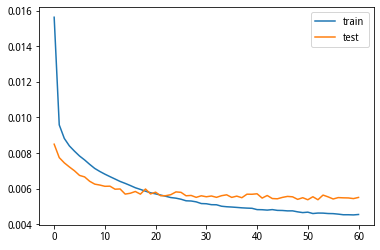

In [94]:
print(weather_clean.columns)

# 训练和预测
# data_perpared:处理后气象数据（数组），squence_length：窗口大小，temper_dim:温度的维度， feature_size： 特征数
def train_and_predict_multi(data_perpared,is_joint=False,squence_length=30,feature_size=7,temper_dim=2,is_train=True):
   
    input_shape = (squence_length,feature_size)
    # train model
    model = BLSTM_model_multi(input_shape,temper_dim)
    model.compile(loss="mse",optimizer=Adam())
    print(model.summary())
    if is_train:
        cb_ckpt = ModelCheckpoint('./checkpoint/weights.{epoch:02d}-{val_loss:.2f}.h5',monitor='val_loss',
                                  save_best_only=True,mode='min',period=20)
        history = model.fit(x_train,y_train,batch_size=32,epochs=100,
                            validation_data=(x_val,y_val),shuffle=True,
                           callbacks=[cb_ckpt,
                            EarlyStopping(monitor='val_loss',patience=10)])
        plt.plot(history.history['loss'],label='train')
        plt.plot(history.history['val_loss'],label='test')
        plt.legend()
        plt.show()
    else:
        y_pred,y_test = test(model,x_test,y_test)
        return y_pred,y_test
    

In [ ]:
# load data
x_train,y_train,x_val,y_val,x_test,y_test = get_data_multi(data_perpared_countys,True,30,26,7)
# 训练模型
#  train_and_predict(x_train,y_train,x_val,y_val,x_test,y_test,True)

In [95]:
# 测试模型
model_path = './checkpoint/weights-multi_acc=0.54.h5' 
print(data_perpared_countys[0].shape)
y_pred,y_test =  train_and_predict(x_train,y_train,x_val,y_val,x_test,y_test,False)

(1820, 26)
features.shape (100945, 780)
labels.shape (100945, 7)
train_samples: (80756, 30, 26) (80756, 7)
validate_samples: (10094, 30, 26) (10094, 7)
test_samples: (10095, 30, 26) (10095, 7)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 30, 26)       0                                            
__________________________________________________________________________________________________
conv1 (Conv1D)                  (None, 30, 64)       3392        input[0][0]                      
__________________________________________________________________________________________________
apool1 (AveragePooling1D)       (None, 15, 64)       0           conv1[0][0]                      
__________________________________________________________________________________________________
forward_lstm (B

### 多分类模型的训练和测试

In [132]:

# 调整列的顺序
weather_clean_class = weather_clean[['sunny', 'cloudy', 'rain', 'fog', 'haze', 'dust',
       'thunder', 'lightning','snow', 'hail', 'wind','pressure', 'wind_speed', 'temperature', 'humidity', 'rain20', 'rain08',
       'cloud', 'visibility','month', 'week','quarter', 'day', 'shanghai', 'beijing', 'chongqin', 'date', 'county']]

# 生成特征列表
data_perpared_countys = generate_features(weather_clean_class)
classes = ['sunny', 'cloudy', 'rain', 'fog', 'haze', 'dust','thunder', 'lightning','snow', 'hail', 'wind']

In [139]:
# 测试模型
from sklearn import metrics
model_path = ''
def test_classify(model,x_test,y_test,classes):
    model.load_weights(model_path)
    y_pred = model.predict(x_test)
    rocauc = metrics.roc_auc_score(y_test,y_pred)
    prauc = metrics.average_precision_score(y_test,y_pred,average='macro')
    print(f'ROC-AUC score={rocauc:.6f}')
    print(f'Prauc score={prauc:.6f}')
    y_prod = (y_pred > 0.5).astype(np.float32)
    acc = metrics.accuracy_score(y_test,y_prod)
    f1 = metrics.f1_score(y_test,y_prod,average='samples')
    print(f'acc score={acc:.6f}')
    print(f'f1 score={f1:.6f}')
    # 计算每个类的准确率
    for i,cls in enumerate(classes):
        cls_rocauc = metrics.roc_auc_score(y_test[:,i],y_pred[:,i])
        cls_prauc = metrics.average_precision_score(y_test[:,i],y_pred[:,i])
        cls_acc = metrics.accuracy_score(y_test[:,i],y_prod[:,i])
        cls_f1 = metrics.f1_score(y_test[:,i],y_prod[:,i])
        print(f'[{i:2} {cls:30}] rocauc={cls_rocauc:.4f} prauc={cls_prauc:.4f} acc={cls_acc:4f} f1={cls_f1:.4f}')
    return y_pred,y_test

In [140]:
# 训练和预测
# data_perpared:处理后气象数据（数组），squence_length：窗口大小，temper_dim:气象的维度， feature_size： 特征数
def train_and_predict_classify(x_train,y_train,x_val,y_val,x_test,y_test,classes,is_train=True):
#     input_shape = (squence_length,feature_size)
    input_shape = (x_train.shape[1],x_train.shape[2])
    # train model
    model = BLSTM_model_multi(input_shape,y_train.shape[1])
    model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['accuracy'])
    print(model.summary())
    if is_train:
        cb_ckpt = ModelCheckpoint('./checkpoint/weights.{epoch:02d}-{val_loss:.2f}.h5',monitor='val_loss',
                                  save_best_only=True,mode='min',period=20)
        history = model.fit(x_train,y_train,batch_size=32,epochs=100,
                            validation_data=(x_val,y_val),shuffle=True,
                           callbacks=[cb_ckpt,
                            EarlyStopping(monitor='val_loss',patience=10)])
        plt.plot(history.history['loss'],label='train')
        plt.plot(history.history['val_loss'],label='test')
        plt.legend()
        plt.show()
    else:
        y_pred,y_test = test_classify(model,x_test,y_test,classes)
        return y_pred,y_test

In [141]:
# load data
x_train,y_train,x_val,y_val,x_test,y_test = get_data_multi(data_perpared_countys,True,30,26,11)
# 训练模型
#  train_and_predict_classify(x_train,y_train,x_val,y_val,x_test,y_test,True)

features.shape (100945, 780)
labels.shape (100945, 11)
train_samples: (80756, 30, 26) (80756, 11)
validate_samples: (10094, 30, 26) (10094, 11)
test_samples: (10095, 30, 26) (10095, 11)


In [142]:
model_path = './checkpoint/weights.20-0.18.h5'
y_pred,y_test = train_and_predict_classify(x_train,y_train,x_val,y_val,x_test,y_test,classes,False)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 30, 26)       0                                            
__________________________________________________________________________________________________
conv1 (Conv1D)                  (None, 30, 64)       3392        input[0][0]                      
__________________________________________________________________________________________________
apool1 (AveragePooling1D)       (None, 15, 64)       0           conv1[0][0]                      
__________________________________________________________________________________________________
forward_lstm (Bidirectional)    (None, 160)          92800       apool1[0][0]                     
__________________________________________________________________________________________________
backward_l

/home/dsp/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/dsp/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dsp/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dsp/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### 应用在空气指数的预测上

In [ ]:
air_index = pd.read_csv('./datasets/air_weather.csv')
# 初步清洗数据
air_index = weather_clean(air_index)
#